Code adapted from the Detectron2 Tutorial on Google Colab, accessed October 9, 2021.
https://colab.research.google.com/drive/16jcaJoc6bCFAQ96jDe2HwtXj7BMD_-m5#scrollTo=9_FzH13EjseR

Last modified by YX on October 9, 2021.

In [1]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.7.1 False


In [2]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from matplotlib import pyplot as plt
# from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [3]:
im = cv2.imread("sample_images/v7w_1.jpg")

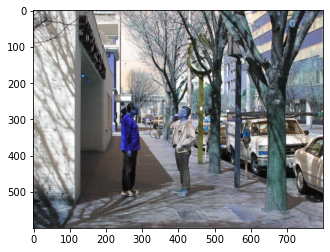

In [7]:
# the imshow method from cv2 crashes jupyter

# Google Colab has a patch method that could serve as a workaround, but
# installing Google Colab destroys the pytorch-jupyter environment, because it downgrades multiple packages
# that jupyter use

# just for visualization purposes, we'll use matplotlib, which is based on a
# tip from https://stackoverflow.com/questions/46236180/opencv-imshow-will-cause-jupyter-notebook-crash
# accessed October 9, 2021

plt.imshow(im)
plt.show()

In [ ]:
cfg = get_cfg()
cfg.MODEL.DEVICE='cpu'
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)